# Project ML - Part II
## Group member name and IDs
### Asifa Batool    -----   F2023266753
### Mariha Javed    -----   F2023266780

## Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')


In [11]:
# Load dataset
df = pd.read_csv("/content/creditcard_fraud_detection.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Checking Shape, Types, Nulls

In [12]:
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (49610, 31)

Data types:
 Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class 

In [13]:
# removing null values
df.dropna(inplace=True)

## Dataset Summary and ploting target feature

               Time            V1            V2            V3            V4  \
count  49609.000000  49609.000000  49609.000000  49609.000000  49609.000000   
mean   28803.247193     -0.242479      0.012321      0.692985      0.185186   
std    13097.419648      1.885778      1.630608      1.510566      1.400175   
min        0.000000    -56.407510    -72.715728    -32.965346     -5.172595   
25%    21734.000000     -0.992814     -0.562958      0.217595     -0.720957   
50%    33390.000000     -0.247067      0.079334      0.796997      0.190288   
75%    38852.000000      1.155641      0.732318      1.430964      1.067346   
max    44134.000000      1.960497     18.183626      4.101716     16.491217   

                 V5            V6            V7            V8            V9  \
count  49609.000000  49609.000000  49609.000000  49609.000000  49609.000000   
mean      -0.257016      0.104114     -0.120255      0.053442      0.123490   
std        1.413057      1.310705      1.283507    

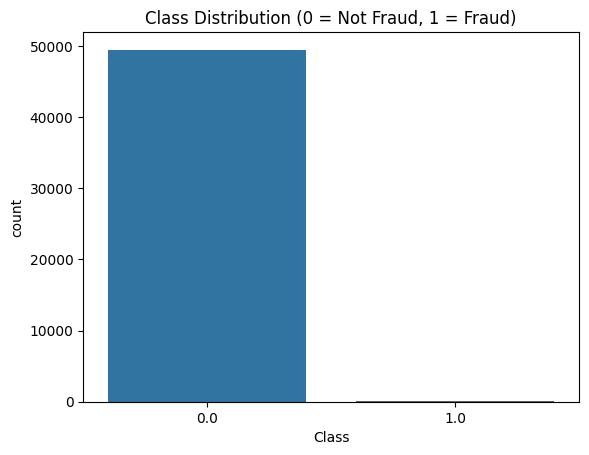

In [14]:
print(df.describe())
print("\nClass Distribution:\n", df['Class'].value_counts())
sns.countplot(data=df, x='Class')
plt.title('Class Distribution (0 = Not Fraud, 1 = Fraud)')
plt.show()


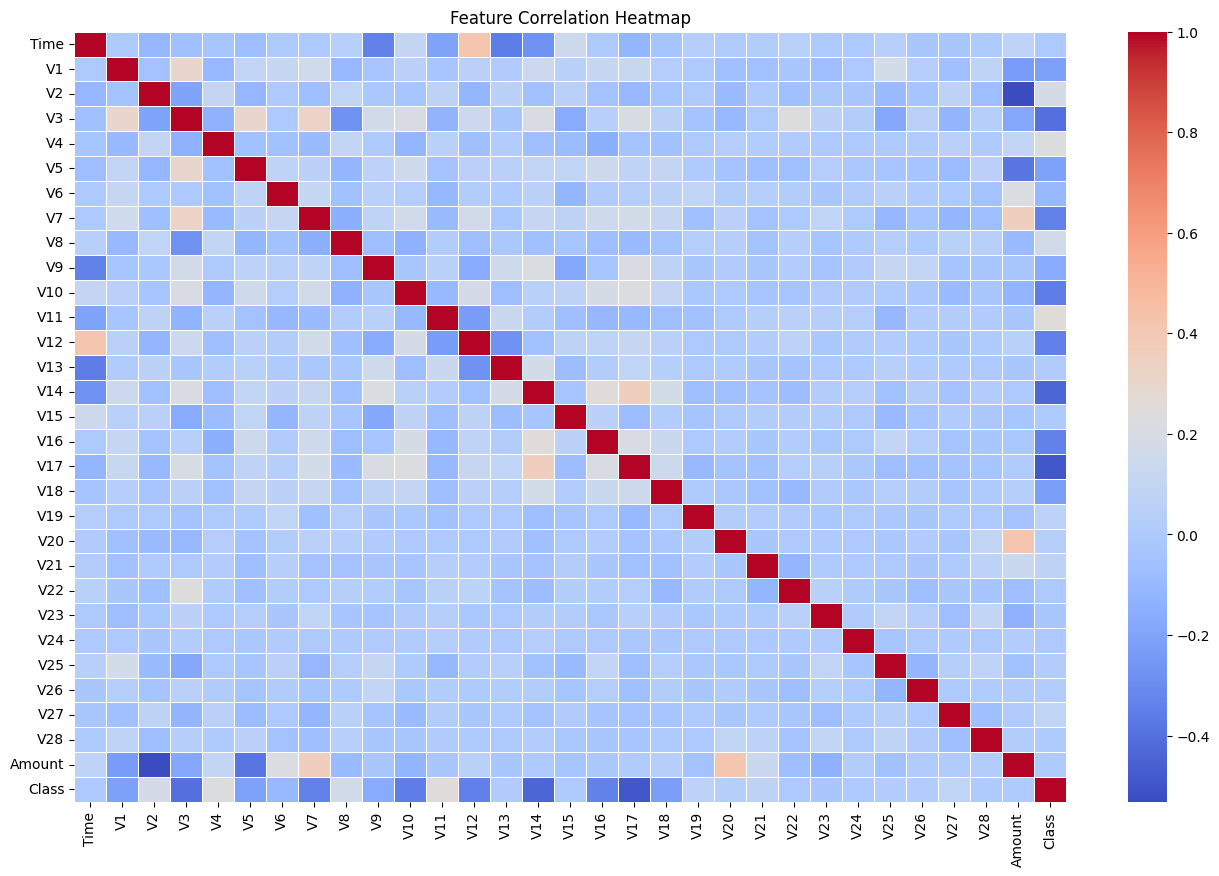

In [15]:
# Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Check for Outliers in 'Amount' and 'Time'

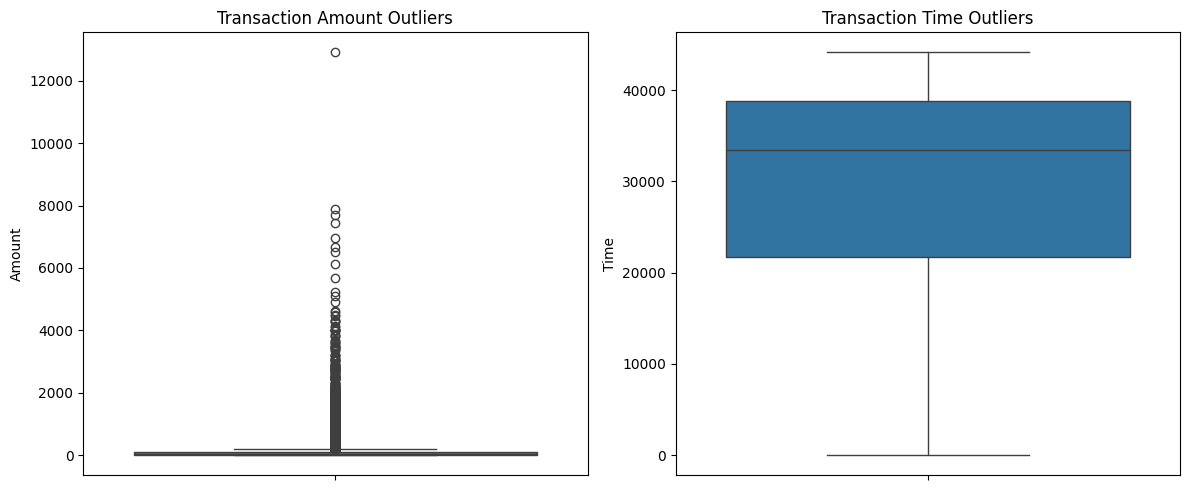

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=df, y='Amount', ax=axs[0])
axs[0].set_title("Transaction Amount Outliers")
sns.boxplot(data=df, y='Time', ax=axs[1])
axs[1].set_title("Transaction Time Outliers")
plt.tight_layout()
plt.show()

## Feature Scaling - StandardScaler for 'Time' and 'Amount'

In [17]:
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])
df.drop(['Time', 'Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.223085,-2.199177
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.357062,-2.199177
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.127440,-2.199100
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.119951,-2.199100
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-0.091331,-2.199024


## Divide dataset using Train-Test Split

In [18]:
# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Stratified split to maintain class ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (39687, 30)
Testing set shape: (9922, 30)


## Import ML models

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [20]:
# function for evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    print(f"----- {model_name} Evaluation -----")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("-" * 40)

## LogisticRegression

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

----- Logistic Regression Evaluation -----
Accuracy: 0.9979842773634348
Precision: 0.65625
Recall: 0.7
F1 Score: 0.6774193548387096

Confusion Matrix:
 [[9881   11]
 [   9   21]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9892
         1.0       0.66      0.70      0.68        30

    accuracy                           1.00      9922
   macro avg       0.83      0.85      0.84      9922
weighted avg       1.00      1.00      1.00      9922

----------------------------------------


## Decision Tree

In [22]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
evaluate_model(y_test, y_pred_dt, "Decision Tree")

----- Decision Tree Evaluation -----
Accuracy: 0.9990929248135456
Precision: 0.92
Recall: 0.7666666666666667
F1 Score: 0.8363636363636363

Confusion Matrix:
 [[9890    2]
 [   7   23]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9892
         1.0       0.92      0.77      0.84        30

    accuracy                           1.00      9922
   macro avg       0.96      0.88      0.92      9922
weighted avg       1.00      1.00      1.00      9922

----------------------------------------


## Random Forest

In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest")

----- Random Forest Evaluation -----
Accuracy: 0.9992944970772022
Precision: 0.9259259259259259
Recall: 0.8333333333333334
F1 Score: 0.8771929824561403

Confusion Matrix:
 [[9890    2]
 [   5   25]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9892
         1.0       0.93      0.83      0.88        30

    accuracy                           1.00      9922
   macro avg       0.96      0.92      0.94      9922
weighted avg       1.00      1.00      1.00      9922

----------------------------------------


## KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")

----- K-Nearest Neighbors Evaluation -----
Accuracy: 0.9993952832090305
Precision: 0.9285714285714286
Recall: 0.8666666666666667
F1 Score: 0.896551724137931

Confusion Matrix:
 [[9890    2]
 [   4   26]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9892
         1.0       0.93      0.87      0.90        30

    accuracy                           1.00      9922
   macro avg       0.96      0.93      0.95      9922
weighted avg       1.00      1.00      1.00      9922

----------------------------------------


## Support Vector Machine (SVM)

In [25]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")


----- Support Vector Machine Evaluation -----
Accuracy: 0.9993952832090305
Precision: 0.9615384615384616
Recall: 0.8333333333333334
F1 Score: 0.8928571428571429

Confusion Matrix:
 [[9891    1]
 [   5   25]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9892
         1.0       0.96      0.83      0.89        30

    accuracy                           1.00      9922
   macro avg       0.98      0.92      0.95      9922
weighted avg       1.00      1.00      1.00      9922

----------------------------------------


## Naive Bayes

In [26]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
evaluate_model(y_test, y_pred_nb, "Naive Bayes")

----- Naive Bayes Evaluation -----
Accuracy: 0.9822616407982262
Precision: 0.13131313131313133
Recall: 0.8666666666666667
F1 Score: 0.22807017543859648

Confusion Matrix:
 [[9720  172]
 [   4   26]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      9892
         1.0       0.13      0.87      0.23        30

    accuracy                           0.98      9922
   macro avg       0.57      0.92      0.61      9922
weighted avg       1.00      0.98      0.99      9922

----------------------------------------


## ANN

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

In [28]:
# Convert to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create datasets and data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=2048, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2048, shuffle=False)

In [29]:
class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(32, 16)
        self.dropout2 = nn.Dropout(0.2)
        self.output = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.output(x))
        return x

input_dim = X_train.shape[1]
model = ANNModel(input_dim)

In [30]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [31]:
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 0.5459
Epoch 2/20, Loss: 0.4349
Epoch 3/20, Loss: 0.2950
Epoch 4/20, Loss: 0.1604
Epoch 5/20, Loss: 0.0801
Epoch 6/20, Loss: 0.0443
Epoch 7/20, Loss: 0.0284
Epoch 8/20, Loss: 0.0210
Epoch 9/20, Loss: 0.0164
Epoch 10/20, Loss: 0.0142
Epoch 11/20, Loss: 0.0118
Epoch 12/20, Loss: 0.0108
Epoch 13/20, Loss: 0.0097
Epoch 14/20, Loss: 0.0090
Epoch 15/20, Loss: 0.0086
Epoch 16/20, Loss: 0.0080
Epoch 17/20, Loss: 0.0079
Epoch 18/20, Loss: 0.0077
Epoch 19/20, Loss: 0.0073
Epoch 20/20, Loss: 0.0070


In [32]:
model.eval()
with torch.no_grad():
    y_pred_proba = model(X_test_tensor).numpy()
    y_pred = (y_pred_proba > 0.5).astype(int)

evaluate_model(y_test, y_pred, "PyTorch ANN")

----- PyTorch ANN Evaluation -----
Accuracy: 0.9969764160451522
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Confusion Matrix:
 [[9892    0]
 [  30    0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9892
         1.0       0.00      0.00      0.00        30

    accuracy                           1.00      9922
   macro avg       0.50      0.50      0.50      9922
weighted avg       0.99      1.00      1.00      9922

----------------------------------------


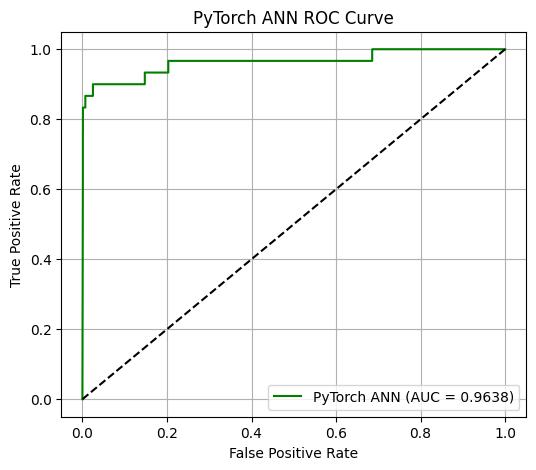

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"PyTorch ANN (AUC = {auc_score:.4f})", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("PyTorch ANN ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()